In [2]:
%matplotlib inline
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [3]:
p1 = cv2.imread('1.png', 0)
p2 = cv2.imread('2.png', 0)
p3 = cv2.imread('3.png', 0)
bird = cv2.imread('bird.png', 0)
w, h = bird.shape[::-1]

In [5]:
print p2

[[195  78  60 ..., 136 150 162]
 [129 156 139 ..., 104 129 146]
 [ 67  59  18 ...,  24 104 129]
 ..., 
 [ 69  51  15 ...,  15  39  56]
 [ 75  65  51 ...,  39  54  62]
 [ 81  73  65 ...,  55  62  67]]


In [26]:
cv2.imshow('a', p2)

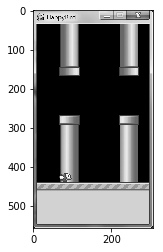

In [4]:
plt.imshow(p2,cmap = 'gray')

In [24]:
print p2

[[195  78  60 ..., 136 150 162]
 [129 156 139 ..., 104 129 146]
 [ 67  59  18 ...,  24 104 129]
 ..., 
 [ 69  51  15 ...,  15  39  56]
 [ 75  65  51 ...,  39  54  62]
 [ 81  73  65 ...,  55  62  67]]


In [20]:
print bird.shape
w, h = bird.shape[::-1]

(24L, 34L)


(66, 416)


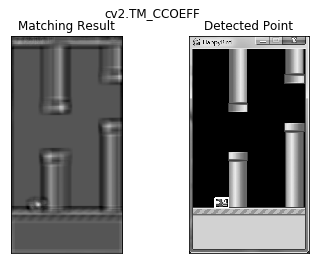

(66, 416)


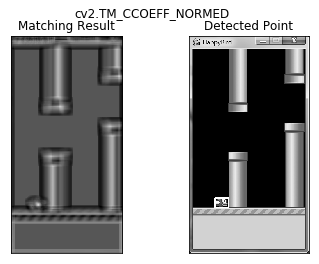

(242, 498)


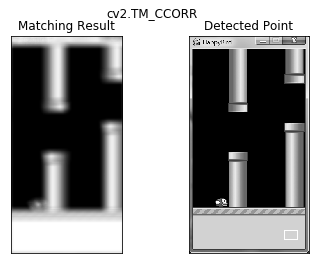

(66, 416)


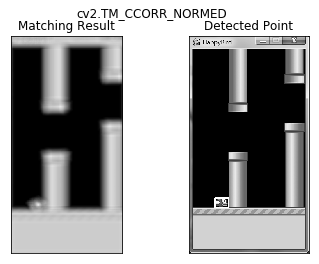

(66, 416)


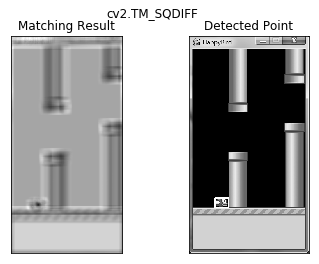

(66, 416)


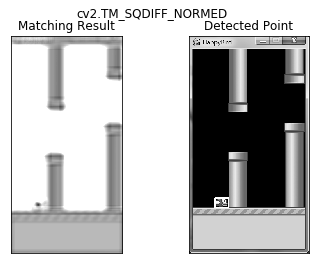

In [8]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = p3.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(p3, bird, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print top_left

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [13]:
p1[416][66]

0

In [14]:
print p1

[[195  78  60 ..., 136 150 162]
 [129 156 139 ..., 104 129 146]
 [ 67  59  18 ...,  24 104 129]
 ..., 
 [ 69  51  15 ...,  15  39  56]
 [ 75  65  51 ...,  39  54  62]
 [ 81  73  65 ...,  55  62  67]]


In [61]:
p1.shape

(536L, 290L, 3L)

In [62]:
np.array_equal(p1, p2)

False

In [63]:
np.array_equal(p2, p3)

False

In [64]:
c = np.count_nonzero(np.asarray(p2) - np.asarray(p3))

In [65]:
print c

10071


In [67]:
t = np.asarray(p1) - np.asarray(p2)

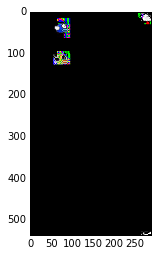

In [71]:
plt.imshow(t)

In [36]:
rangle = (26, 112, 316, 615)
t = ImageGrab.grab(rangle)

TypeError: src is not a numpy array, neither a scalar

In [41]:
b = np.asarray(t)
a = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY) 

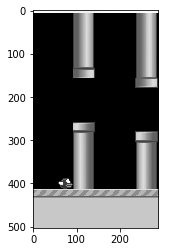

In [43]:
plt.imshow(a,cmap = 'gray')

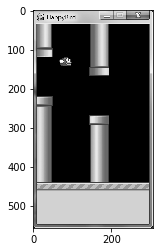

In [35]:
plt.imshow(p1,cmap = 'gray')

In [42]:
print np.sum(p2-p3)

0


In [19]:
len(p1) == len(p2)

TypeError: object of type 'NoneType' has no len()

In [19]:
# coding: utf-8
import math
import time
import cv2
import numpy as np
import win32api
import win32con
from PIL import ImageGrab

class FlappyBirdPlayer:

    def __init__(self):
        self.live_time = time.time()
        self.template = cv2.imread('bird.png', 0)

    def act(self, hld):
        win32api.SendMessage(hld, win32con.WM_KEYDOWN, win32con.VK_UP, 0)
        win32api.SendMessage(hld, win32con.WM_KEYUP, win32con.VK_UP, 0)
        time.sleep(0.02)

    def wait_restart(self, a, b, rangle):
        now = time.time()
        while True:
            if np.array_equal(a, b):
                self.live_time = now
                return
            time.sleep(0.05)
            a = b
            b = ImageGrab.grab(rangle)

    def findBirdY(self, img):
        res = cv2.matchTemplate(img , self.template, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        return max_loc
    
    def isCrash(self, img, x, y):

        if img[x][y-1] > 10:
            return True
        if img[x+24][y-1] > 10:
            return True
        if img[x+23][y+34] > 10:
            return True
        if img[x+24][y+33] > 10:
            return True
        if img[x+23][y] > 10:
            return True
        if img[x-1][y] > 10:
            return True
        if img[x-1][y+34] > 10:
            return True
        if img[x][y+34] > 10:
            return True
        return False

    def checkTerminal(self, img):
        now = time.time()
        lasting = now - self.live_time
        #reward = 0.2 /(1+math.exp(-lasting))
        reward = 0.1
        y, x= self.findBirdY(img)
        print x, y
        terminal = False
        if self.isCrash(img, x, y):
            terminal = True
            reward = -1
        if not terminal and lasting > 1.8:
            reward = 1
            self.live_time = now

        return reward, terminal

In [20]:
player = FlappyBirdPlayer()

player.checkTerminal(p1)

120 66


(0.1, False)

In [23]:
print player.checkTerminal(p2)
print player.checkTerminal(p3)

147 89
(-1, True)
416 66
(-1, True)


In [ ]:
player.checkTerminal(p1)

In [44]:
player.checkTerminal(a)

388 58


(-1, True)